# SDA project

### Introduction to the project
The goal of this project is to analyze sample data from a telecom operator Megaline, the company offers its clients two prepaid plans, Surf and Ultimate. The commercial department wants to know which of the plans brings in more revenue in order to adjust the advertising budget.

### Step 1. Open the data file and study the general information
Opening the data files and making sure they run correctly!


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt #I had to add this with the corrections
import numpy as np
# import seaborn as sb
from scipy import stats as st 
from functools import reduce
from scipy import stats

%matplotlib inline


In [2]:
import seaborn as sns
print(sns.__version__)

0.11.2


In [3]:
try:
    calls_df = pd.read_csv('megaline_calls.csv')
    internet_df = pd.read_csv('megaline_internet.csv')
    messages_df = pd.read_csv('megaline_messages.csv')
    plans_df =  pd.read_csv('megaline_plans.csv')
    users_df = pd.read_csv('megaline_users1.csv')
except:
        print('cannot load files')


### Step 2. Prepare the data
Preliminary data prep and exploration 

In [4]:
calls_df

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
...,...,...,...,...
137730,1499_199,1499,2018-11-21,8.72
137731,1499_200,1499,2018-10-20,10.89
137732,1499_201,1499,2018-09-21,8.12
137733,1499_202,1499,2018-10-10,0.37


In [5]:
print(len(calls_df))
calls_df.head() 

137735


,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


In [6]:
calls_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [7]:
internet_df.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


In [8]:
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [9]:
messages_df.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


In [10]:
messages_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [11]:
messages_df=messages_df.rename(columns={'id': 'messages'}) #renaming a column

In [12]:
messages_df.head()

,messages,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


In [13]:
#sum(messages_df['message_date']==0)

In [14]:
plans_df.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [15]:
users_df.head()

,user_id,first_name,last_name,age,city,reg_date,tariff,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


#### preparing the column for further calculations

In [16]:
#calls_df['duration'] = calls_df['duration'].round(decimals = 0) #rounding up the values before grouping

calls_df['duration']=calls_df['duration'].apply(np.ceil)
calls_df['duration'].head(3)

0     9.0
1    14.0
2    15.0
Name: duration, dtype: float64

In [17]:
calls_df['call_date'] = pd.to_datetime(calls_df.call_date) #converting to datetime

In [18]:
calls_df['month'] = calls_df['call_date'].dt.month #adding month column

In [19]:
calls_df.head()

,id,user_id,call_date,duration,month
0,1000_93,1000,2018-12-27,9.0,12
1,1000_145,1000,2018-12-27,14.0,12
2,1000_247,1000,2018-12-27,15.0,12
3,1000_309,1000,2018-12-28,6.0,12
4,1000_380,1000,2018-12-30,5.0,12


In [20]:
df_calls_per_user = calls_df.groupby(['user_id', 'month'])['duration'].sum()  #grouping per month
df_calls_per_user=df_calls_per_user.to_frame()

In [21]:
df_calls_per_user.head(2)

,,duration
user_id,month,
1000,12,124.0
1001,8,182.0


In [22]:
internet_df['session_date'] = pd.to_datetime(internet_df.session_date) #converting to datetime

In [23]:
internet_df['month'] = internet_df['session_date'].dt.month #adding month column

In [24]:
df_data_per_user = internet_df.groupby(['user_id', 'month'])['mb_used'].sum() #grouping per month
#df_data_per_user = df_data_per_user.to_frame()

In [25]:
df_data_per_user=df_data_per_user / 1024 #converting to gb 

In [26]:
df_data_per_user=df_data_per_user.round(decimals = 0) #rounding up!

In [27]:
messages_df['message_date'] = pd.to_datetime(messages_df.message_date) #converting to datetime

In [28]:
messages_df['month'] = messages_df['message_date'].dt.month #adding month column

In [29]:
df_sms_per_user = messages_df.groupby(['user_id', 'month'])['messages'].count()  #grouping per month
df_sms_per_user=df_sms_per_user.to_frame()


In [30]:
df_sms_per_user.head(3) #checking if this works 

messages
user_id month          
1000    12           11
1001    8            30
        9            44

In [31]:
data_frames = [df_calls_per_user, df_data_per_user, df_sms_per_user]

df_merged = reduce(lambda left,right: pd.merge(left,right,on=['user_id','month'], how='outer'), data_frames)

In [32]:
df_merged=df_merged.reset_index()
print(len(df_merged))
df_merged.head(5)

2293


,user_id,month,duration,mb_used,messages
0,1000,12,124.0,2.0,11.0
1,1001,8,182.0,7.0,30.0
2,1001,9,315.0,13.0,44.0
3,1001,10,393.0,22.0,53.0
4,1001,11,426.0,18.0,36.0


In [33]:
plans_df

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [34]:
users_df.head()

,user_id,first_name,last_name,age,city,reg_date,tariff,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


In [35]:
users_df=users_df.rename(columns= {'tariff': 'plan'})


##### In order to calculate the monthly revenue column I added the tariff column

In [36]:
df_merged = pd.merge(df_merged, users_df[['user_id', 'plan']], on ='user_id')
df_merged.head()

,user_id,month,duration,mb_used,messages,plan
0,1000,12,124.0,2.0,11.0,ultimate
1,1001,8,182.0,7.0,30.0,surf
2,1001,9,315.0,13.0,44.0,surf
3,1001,10,393.0,22.0,53.0,surf
4,1001,11,426.0,18.0,36.0,surf


In [37]:
def monthly_pay(row):
    
    plan = row['plan']
    call_duration = row['duration']   
    text_duratiom = row['messages']
    data_use = row['mb_used']
    call_revenue = 0
    text_revenue = 0
    data_revenue = 0
#     print(f'{row.user_id} - Call duration:{call_duraion}, Text duration:{text_duratiom}, Data use:{data_use}')
    if plan=='surf':
        fix_cost = 20
        call_limit = 500
        minut_fee = 0.03
        text_limit = 50
        text_fee = 0.03
        data_limit = 15
        fata_fee = 10
#         print(f'Call limit:{call_limit}, Text limit:{text_limit}, Data limit:{data_limit}')
           
    else:
        
        fix_cost = 70
        call_limit = 3000
        minut_fee = 0.01
        text_limit = 1000
        text_fee = 0.01
        data_limit = 30
        fata_fee = 7
#         print(f'Call limit:{call_limit}, Text limit:{text_limit}, Data limit:{data_limit}')
        
    if call_duration > call_limit:
        call_revenue = (call_duration-call_limit) * minut_fee
#         print('pay for calls')

    if text_duratiom > text_limit:
        text_revenue = (text_duratiom-text_limit) * text_fee
#         print('pay for text')

    if data_use > data_limit:
        data_revenue = (data_use-data_limit) * fata_fee
#         print('pay for data')
    
    revenue = fix_cost + call_revenue + text_revenue + data_revenue 
#     print(f'fix_cost- {fix_cost}, call_revenue - {call_revenue}, text_revenue - {text_revenue}, data_revenue - {data_revenue}, revenue - {revenue} ')
    return revenue  

##### Calculating and adding the monthly revenue column

In [38]:
df_merged['revenue_pm'] = df_merged.apply(monthly_pay, axis=1)

In [39]:
df_merged.head(5)

,user_id,month,duration,mb_used,messages,plan,revenue_pm
0,1000,12,124.0,2.0,11.0,ultimate,70.00
1,1001,8,182.0,7.0,30.0,surf,20.00
2,1001,9,315.0,13.0,44.0,surf,20.00
3,1001,10,393.0,22.0,53.0,surf,90.09
4,1001,11,426.0,18.0,36.0,surf,50.00


<b> Conclusion </b>

For the preliminary inspection and evaluation of the data I used the head() and info() method to take a look at all of five data sets before chaining or removing anything. 


* calls_df - I decided not to remove the rows with zero values in this data set, even though they did not seem to serve any purpose for the analysis the reduction of the data framed as they were grouped according to month may have eliminated them, they might have an effect on the histograms and can be removed as outliers. Before grouping the data I used round() method to round up the minutes, In order to group the data by month I used the datetime() method.
* internet_df - due to this data being in mb I first changed the date column to datetime and grouped by month so only after that I converted to gb by dividing the column by 1000. For now, I decided not to remove zero values.  
* messages_df - there were no zero values in this data frame, to help further comprehensive work with this data frame I decided to change the 'id' column to 'messages', since that's what this column represents. The same as in the calls and internet columns I rounded up and grouped the data by month. 

The new data frame I constructed is called df_merged, I combined all three data frames using the reduce method according to the user_id per month. In order to calculate the revenue per month from each user I added the tariff column and after calculating the revenue per month I added another with the monthly revenue per user.



### Step 3. Analyze the data

In [40]:
df_merged.isnull().sum() 

user_id         0
month           0
duration       35
mb_used        16
messages      487
plan            0
revenue_pm      0
dtype: int64

This makes sense since some people prefer not to use sms (they can use data instead)

In [41]:
df_merged.describe()

,user_id,month,duration,mb_used,messages,revenue_pm
count,2293.000000,2293.000000,2258.000000,2277.000000,1806.000000,2293.000000
mean,1246.075883,9.172700,435.937555,16.481335,42.110188,62.128295
std,143.051927,2.496386,231.972343,7.684190,33.122931,45.501479
min,1000.000000,1.000000,0.000000,0.000000,1.000000,20.000000
25%,1122.000000,8.000000,275.000000,12.000000,17.000000,22.370000
50%,1245.000000,10.000000,429.000000,16.000000,34.000000,70.000000
75%,1368.000000,11.000000,574.750000,21.000000,59.000000,70.000000
max,1499.000000,12.000000,1510.000000,69.000000,266.000000,580.370000


In [42]:
print(df_merged['duration'].median())
print(df_merged['mb_used'].median())
print(df_merged['messages'].median())

429.0
16.0
34.0


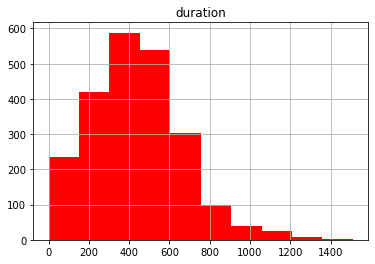

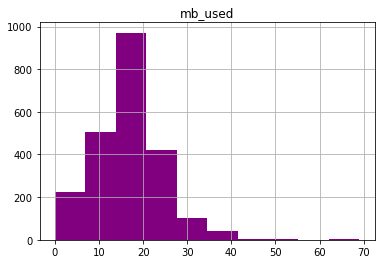

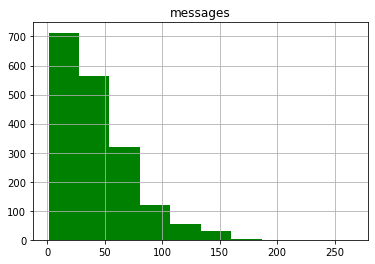

In [43]:
task = ['duration', 'mb_used', 'messages']
color = ['red', 'purple', 'green']

for c_i, i in enumerate(task):
    df_merged.hist(i, color=color[c_i])
    
#positive skew in all the plots! 

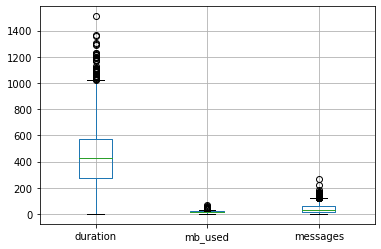

In [44]:
df_merged.boxplot(column = ['duration', 'mb_used', 'messages']); #figsize=(10,10))

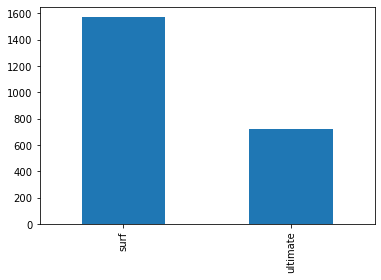

In [45]:
df_merged['plan'].value_counts().plot(kind='bar');

In [46]:
#pandas version
pd.__version__


'1.2.4'

duration 0 red
mb_used 1 purple
messages 2 green


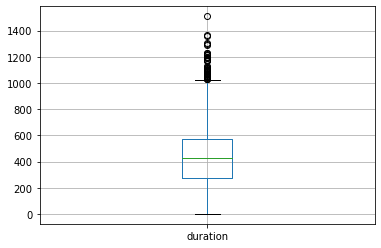

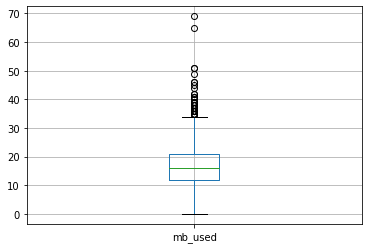

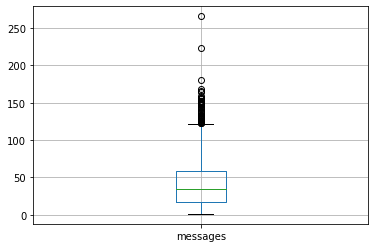

<Figure size 432x288 with 0 Axes>

In [47]:
task = ['duration', 'mb_used', 'messages']
color = ['red', 'purple', 'green']

for c_i, i in enumerate(task):
    print(i,c_i,color[c_i])
#     df_merged.boxplot(i, color=color[c_i]);
    df_merged.boxplot(i);
    plt.figure();

In [48]:
df_merged.groupby(['plan'])['revenue_pm'].std()

plan
surf        53.839188
ultimate    10.812881
Name: revenue_pm, dtype: float64

In [49]:
df_merged.groupby(['plan'])['revenue_pm'].std()/df_merged.groupby(['plan'])['revenue_pm'].mean()
#calculating cv (covariance)

plan
surf        0.935365
ultimate    0.149950
Name: revenue_pm, dtype: float64

<b> Conclusion </b>

* call = mean 435.93, STD 231.97, median 404.0
* messages = mean 42, STD 33.12, median 34.0
* gb_use = mean 16.88, STD 7.88, median 17.0


The boxplots show significant outliers in calls messages an data. However, it is not unusual to have people who prefer having long conversations, or to only text or use up more data. So in this case, and due to the small and very tidy data set, there are no real outliers and the whiskers of the boxplot are actual useful data that can help with the company's future business plans. Similar to a customer that buys a lot in a shop, it may not be very common but definitely very profitable.

In calls, messages and data use, we have zero values. This makes a lot of sense, for instance elderly people don't normally use messages or data, deaf people don't use the calls, only text or data. The missing values in this case are important. 

<b> The average customer in megaline talks about 411 minutes a month, texts 42 times and uses up 16.88 gb of data per month.
The outliers of this dataset are skewed to right in a positive skew due to the nature of the outliers. </b>


 

### Step 4. Test the hypotheses

* The average revenue from users of Ultimate and Surf calling plans differs.
* the average revenue from users in NY-NJ area is different from that of the the users from other regions.

#### First hypotheses 

First I want to take a look at the frequency of the plans, it's much more clear visually

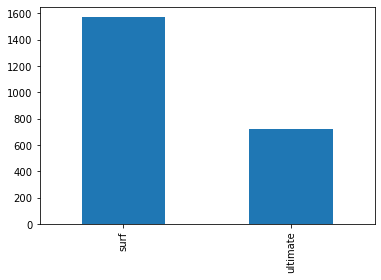

In [50]:
df_merged['plan'].value_counts().plot(kind='bar');

In [51]:
sns.__version__
# sns.histplot?

'0.11.2'

In [52]:
def tariff_stat(plan):
    fig, ax = plt.subplots(figsize=(8,7))
    ax=sns.histplot(df_merged, x=plan, hue='plan')
    mean=df_merged[plan].mean()
    std=df_merged[plan].std()
    var=df_merged[plan].var()
    cv=std/mean
    plt.show()
    print('Average is', mean)
    print(df_merged.groupby(['plan'])[plan].mean())
    if cv>1:
        print('Varies a lot')
    else:
        print('Centered around average')

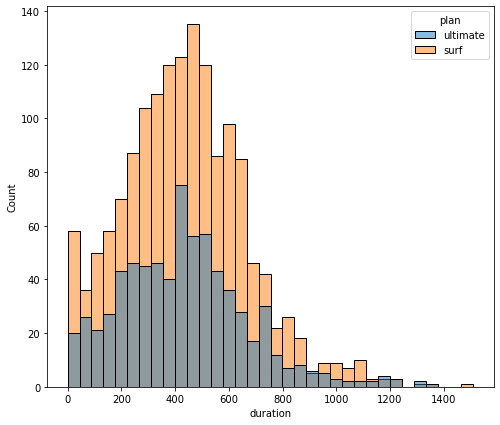

Average is 435.9375553587245
plan
surf        436.519741
ultimate    434.676017
Name: duration, dtype: float64
Centered around average


In [53]:
tariff_stat('duration')

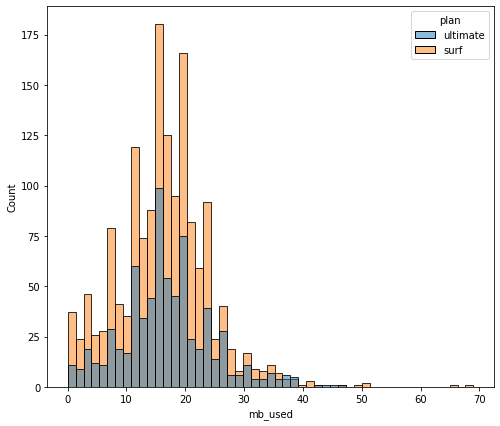

Average is 16.481335090030743
plan
surf        16.320282
ultimate    16.830320
Name: mb_used, dtype: float64
Centered around average


In [54]:
tariff_stat('mb_used')

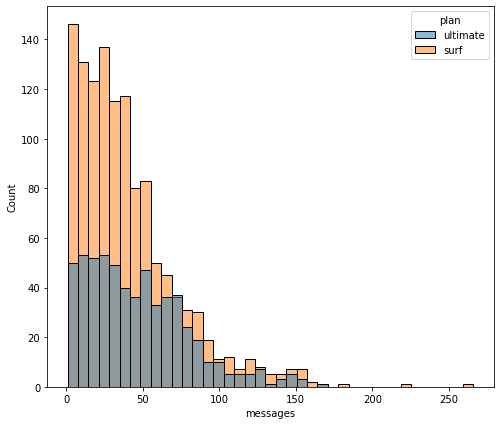

Average is 42.110188261351055
plan
surf        40.109656
ultimate    46.296233
Name: messages, dtype: float64
Centered around average


In [55]:
tariff_stat('messages')

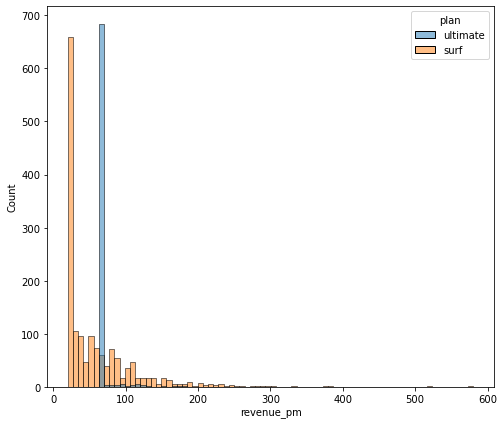

Average is 62.12829481029209
plan
surf        57.559555
ultimate    72.109722
Name: revenue_pm, dtype: float64
Centered around average


In [56]:
tariff_stat('revenue_pm')

It is very obvious that the more clients use the Surf plan (approximately 2:1) and that the revenue per Ultimate plan is significantly higher than Surf plan. 

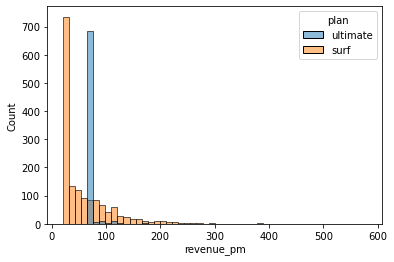

In [57]:
sns.histplot(df_merged, x='revenue_pm', hue='plan', bins=50);

In [58]:
rev_surf=df_merged[df_merged['plan']=='surf']['revenue_pm']

In [59]:
rev_ultimate = df_merged[df_merged['plan']=='ultimate']['revenue_pm']

In [60]:
stats.ttest_ind(rev_surf, rev_ultimate)

Ttest_indResult(statistic=-7.18480185138973, pvalue=9.062843149268311e-13)

In [61]:
p1_value=stats.ttest_ind(rev_surf, rev_ultimate).pvalue
p1_value

9.062843149268311e-13

In [62]:
alpha=0.05
if p1_value<alpha:
    print('Reject hypotheses: average of revenue is different')
else:
    print('Fail to Reject hypotheses')

Reject hypotheses: average of revenue is different


#### Second hypotheses 

In [63]:
users_df.head(2)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN


In [64]:
df_merged = pd.merge(df_merged, users_df[['user_id', 'city']], on ='user_id')
df_merged.head() #adding the city column

,user_id,month,duration,mb_used,messages,plan,revenue_pm,city
0,1000,12,124.0,2.0,11.0,ultimate,70.00,"Atlanta-Sandy Springs-Roswell, GA MSA"
1,1001,8,182.0,7.0,30.0,surf,20.00,"Seattle-Tacoma-Bellevue, WA MSA"
2,1001,9,315.0,13.0,44.0,surf,20.00,"Seattle-Tacoma-Bellevue, WA MSA"
3,1001,10,393.0,22.0,53.0,surf,90.09,"Seattle-Tacoma-Bellevue, WA MSA"
4,1001,11,426.0,18.0,36.0,surf,50.00,"Seattle-Tacoma-Bellevue, WA MSA"


In [65]:
df_nynj = df_merged[df_merged['city']=='New York-Newark-Jersey City, NY-NJ-PA MSA'] #making a data frame for NY and NJ

In [66]:
df_notny = df_merged[df_merged['city']!='New York-Newark-Jersey City, NY-NJ-PA MSA'] #making a data frame for NOT NY and NJ 

In [67]:
df_surf= df_merged.query('plan=="surf"')
df_ultimate= df_merged.query('plan=="ultimate"')

In [68]:
sample1=df_nynj['revenue_pm']
sample2=df_notny['revenue_pm']

In [69]:
from scipy import stats

In [70]:
stats.ttest_ind(sample1, sample2) #we reject the null hypothesus

Ttest_indResult(statistic=-2.192302251554125, pvalue=0.02845796412415147)

In [71]:
p_value=stats.ttest_ind(sample1, sample2).pvalue
p_value

0.02845796412415147

In [72]:
#p_value=p_value.aspype(int)
alpha=0.05
if p_value<alpha:
    print('Reject hypotheses: average of NY-Nj users is not equal to average of other cties')
else:
    print('Fail to Reject hypotheses: we don\'t have enough evidanceto say that averages of sample1 and other cities are not the same')

Reject hypotheses: average of NY-Nj users is not equal to average of other cties


#### Conclusion

To test the first hypotheses I calculated histograms that compare the averages of each plan on several parameters:
* calls - surf  436.51, ultimate  434.67
* data use - surf 16.72, ultimate 17.24
* messages - surf 40.1, ultimate 46.29


There are definite differences between the average measurements. The customers using surf, prefer to talk more on the phone, while ultimate subscribers use more data and on average text more.

<b> Total revenue </b> the most interesting observation is that even though the Surf plan is much more popular it is not on average more profitable, the Ultimate plan is more profitable for the company on average.

For the second hypotheses I used the p_value. The p_value is the probability value, as the difference statistic between the mean and the value  compared it to, and the statistical significance. 
The p_value turned out to be 0.044, lower then 0.05 the null hypotheses is rejected.

I decided the alpha would be the usual 0.05 (5%), which us the usual choice for alpha.

### Step 5. Write an overall conclusion

The preprocessing process included reorganizing the data of the three main data frames, grouping them in to months and rounding the call seconds and the mega bytes (I made sure to group up the column according to months before converting go gigabytes and rounding). I merged the three data framed and added two columns, one for the tariff and another one for the monthly income that I calculated according to the plans column.
Using the histograms and boxplots I uncovered extreme values that are not in fact outliers, they are frequent users with specific preferences. Also the data set has some zero values that can be explained with the same logic, customers that use only phone calls to communicate or only text messages.

While investigating the hypotheses I learned that there are definite differences between the average measurements. The customers using surf, prefer to talk more on the phone, while ultimate subscribers use more data and on average text more.

From the histograms analyses that the Surf plan appears more frequently, and is more popular, however on average the Ultimate plan produces more revenue. This might have several business implications, maybe some of the Surf clients can be encouraged to change to the Ultimate plan based on their consumption of data and use of messages, or start a marketing campaign for Ultimate payment plan.   

Notes for developers:
* 'id' column in messages_df - what does the number represent? Is it a time stamp?